In [1]:
from getdata import GetDataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data,target = GetDataset(CreateDataFrame=True).Outputdata()

In [3]:
x = np.linspace(data[0][0].min(),data[0][0].max(),901)
data2 = np.zeros((data.shape[0],901))
for i in range(data.shape[0]):
    data2[i,:] = np.interp(x,data[i][0],data[i][1])

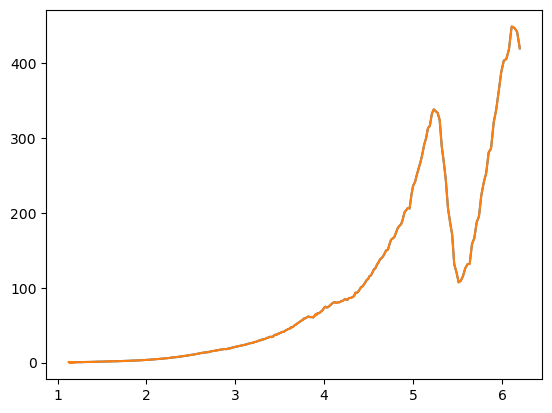

In [4]:
plt.plot(x,data2[600])
plt.plot(data[600][0],data[600][1])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error, max_error
X_train, X_test, y_train, y_test = train_test_split(data2, target, test_size=0.2, random_state=42, shuffle=True)
X_grid, _, y_grid, _ = train_test_split(data2, target, test_size=0.8, random_state=42, shuffle=True)

In [5]:
MSE_scorer = make_scorer(mean_squared_error,greater_is_better=False)

Scorer

Regresion Lineal

In [7]:
model_linear = LinearRegression()


linear_regression_params = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1,1,2,3]
}

# Realizar la búsqueda de hiperparámetros
grid_search_linear = GridSearchCV(model_linear, linear_regression_params, cv=5, scoring=MSE_scorer)
grid_search_linear.fit(X_train, y_train)
results = grid_search_linear.cv_results_

print("Mejores parámetros:", grid_search_linear.best_params_)
print("Mejor puntaje:", -grid_search_linear.best_score_)


Mejores parámetros: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1}
Mejor puntaje: 14.318867039479196


Regresion Logistica

SVR

Decision Tree

In [8]:
model_DT = DecisionTreeRegressor()



decision_tree_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}


# Realizar la búsqueda de hiperparámetros
grid_search_DT = GridSearchCV(model_DT, decision_tree_params, cv=5, scoring=MSE_scorer,n_jobs=-1)
grid_search_DT.fit(X_train, y_train)

results = grid_search_DT.cv_results_
# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search_DT.best_params_)
print("Mejor puntaje:", -grid_search_DT.best_score_)


Mejores parámetros: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mejor puntaje: 0.1737831711580789


Random Forest

In [9]:
model_RF = RandomForestRegressor()

random_forest_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Realizar la búsqueda de hiperparámetros
grid_search_RF = GridSearchCV(model_RF, random_forest_params, cv=5, scoring=MSE_scorer,n_jobs=-1)
grid_search_RF.fit(X_train, y_train)

results = grid_search_RF.cv_results_
# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search_RF.best_params_)
print("Mejor puntaje:", -grid_search_RF.best_score_)

KeyboardInterrupt: 

In [7]:
model_mlp = MLPRegressor()

mlp_regressor_params = {
    'hidden_layer_sizes': [(50,), (100,), (200,)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

# Realizar la búsqueda de hiperparámetros
grid_search_mlp = GridSearchCV(model_mlp, mlp_regressor_params, cv=5, scoring=MSE_scorer)
grid_search_mlp.fit(X_train, y_train)

results = grid_search_mlp.cv_results_
# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search_mlp.best_params_)
print("Mejor puntaje:", -grid_search_mlp.best_score_)

c:\Users\Wilhelm\miniconda3\envs\ML\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Wilhelm\miniconda3\envs\ML\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
c:\Users\Wilhelm\miniconda3\envs\ML\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Wilhelm\miniconda3\envs\ML\Lib\site-packages\sklearn\neural_network\_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
c:\Users\Wilhelm\miniconda3\envs\ML\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
c:\Users\Wilhelm\miniconda3\envs\ML\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: invalid value encountered in matmu

In [ ]:
model_XGBoost = GradientBoostingRegressor()

XGBoost_regressor_params = {
    'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'],
    'learning_rate': [0.01,0.1,1],
    'n_estimators': [100,200,300],
    'subsample': [1.,2.,3.],
    'criterion': ['friedman_mse', 'squared_error'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Realizar la búsqueda de hiperparámetros
grid_search_XGBoost = GridSearchCV(model_XGBoost, XGBoost_regressor_params, cv=5, scoring=MSE_scorer)
grid_search_XGBoost.fit(X_train, y_train)

results = grid_search_XGBoost.cv_results_
# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search_XGBoost.best_params_)
print("Mejor puntaje:", -grid_search_XGBoost.best_score_)

In [ ]:
model_SVR = SVR()

svr_params = {
    'kernel': ['rbf', 'sigmoid'],
    'C': [0.01, 0.1, 1, 5],
    'gamma': ['scale', 'auto'],
    'tol': [1e-3,1e-1,1],
    'epsilon': [0.1, 0.2, 0.5]
}

# Realizar la búsqueda de hiperparámetros
grid_search_svr = GridSearchCV(model_SVR, svr_params, cv=5, scoring=MSE_scorer,n_jobs=-1)
grid_search_svr.fit(X_train, y_train)

results = grid_search_svr.cv_results_
# Mostrar los mejores parámetros y el mejor score
print("Mejores parámetros:", grid_search_svr.best_params_)
print("Mejor puntaje:", -grid_search_svr.best_score_)

KeyboardInterrupt: 